In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [2]:
#Les exemples sont rangés en colonnes. Il y a 10 000 exemples (10 000 colonnes) de dimension 784 (784 lignes)
Basetrain = np.load('basetrain.npy')
Labeltrain = np.load('labeltrain.npy')
Basetest = np.load('basetest.npy')
Labeltest = np.load('labeltest.npy')

In [3]:
#%qtconsole

In [4]:
def mlp1def(n, m):
    #Crée un vecteur de poids aléatoires, m neurones, n entrées
    w = np.zeros((m,n+1))
    for i in range(m):
        for j in range(n+1):
            w[i,j] = rd.uniform(-1,1)
    #w = np.random.rand(m,n+1)
    return w

In [5]:
def sigma(v):
    #Définition de la fonction tanh
    #return (1-np.exp(-2*v))/(1+np.exp(-2*v))
    return np.tanh(v)

In [6]:
def mlp1run(x,w):
    if len(np.shape(x))==1:
        x = np.concatenate(([1],x), axis=0)
    else:
        x = np.concatenate((np.ones((1,np.shape(x)[1])),x),axis=0)
    #Calcul les sorties avant sigmoide
    v = np.dot(w,x)
    m,N = v.shape
    V = np.zeros((m,N))
    for i in range(m):
        for j in range(N):
            V[i,j] = sigma(v[i,j])
    return {'v':v,'sig(v)':V,'x':x}

In [7]:
def mlpclass(y):
    #Retourne les classes de la sortie y 
    if len(x.shape)==1:
        res = np.argmax(y)
    else: 
        res = []
        for i in range(y.shape[1]):
            res.append(np.argmax(y[:,i]))
    return res

In [8]:
def score(label, pred):
    #Retourne le score de la prédiction
    verification = label == pred
    res = [e for e in verification if e ==True]
    nb = len(res)
    taux = round(len(res)/len(verification),2)
    return {'nb': nb,'taux': taux }

In [9]:
def sigmop(v):
    #calcule la dérivée de la tanh
    return 1 - sigma(v)**2

In [10]:
def label2target(c):
    #Calcule les vecteurs de sortie désirée en fonction des classes en entrée
    n = len(c)
    res = -np.ones((10,n))
    for i in range(n):
        res[c[i],i] = 1
    return res

In [11]:
def mlperror(y, target):
    #Calcule l'erreur
    return target - y

In [12]:
def sqrerror(error):
    #Calcul l'erreur au sein des moindres carrés
    sqrmatrix = [e**2 for e in error]
    res = sum(sum(sqrmatrix))
    return res

In [13]:
from time import time
time1 = time()
lr = 0.001
it = 1000
x = Basetrain/255
target = label2target(Labeltrain)
w = mlp1def(784,10)
L = []
for k in range(it):
    run = mlp1run(x,w)
    y = run['sig(v)']
    v = run['v']
    error = mlperror(y,target)
    l = sqrerror(error)
    dev = sigmop(v)
    error_x_dev = error*dev
    delta_w = lr*np.dot(error_x_dev,np.transpose(run['x']))
    w = w + delta_w
    L.append(l)
time2 = time()
print(time2-time1)

291.1535975933075


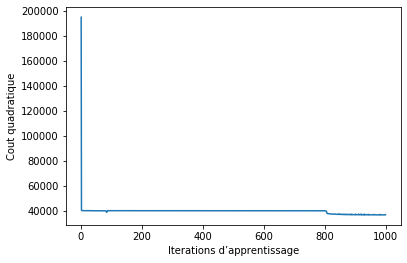

In [14]:
axe_x=np.linspace(1,it,it)
plt.plot(axe_x,L)
plt.ylabel('Cout quadratique')
plt.xlabel("Iterations d’apprentissage")
plt.show()

In [15]:
run = mlp1run(Basetrain,w)
pred = np.array(mlpclass(run['sig(v)']))
target = np.array(mlpclass(label2target(Labeltrain)))
s_test = score(target,pred)

In [16]:
print(s_test)

{'nb': 1938, 'taux': 0.19}


In [17]:
run = mlp1run(Basetest,w)
pred = np.array(mlpclass(run['sig(v)']))

In [18]:
target = np.array(mlpclass(label2target(Labeltest)))
s = score(target,pred)

In [19]:
print(s)

{'nb': 405, 'taux': 0.2}
